<a href="https://colab.research.google.com/github/IamRash-7/Small-Image-Classification-CNN/blob/main/small_ImgRecog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

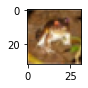

In [ ]:
plot_sample(0)

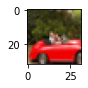

In [ ]:
plot_sample(99)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes[y_train[0][0]]

'frog'

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [ ]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [ ]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000,activation='relu'),
        keras.layers.Dense(1000,activation='relu'),
        keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled,y_train_categorical,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8678 - accuracy: 0.3317
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6612 - accuracy: 0.4114
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5746 - accuracy: 0.4435
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5080 - accuracy: 0.4667
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4567 - accuracy: 0.4867
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4139 - accuracy: 0.5016
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3782 - accuracy: 0.5131
Epoch 8/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3396 - accuracy: 0.5275
Epoch 9/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3073 - accuracy: 0.5398
Epoch 10/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.278

In [ ]:
classes[np.argmax(model.predict(X_test_scaled)[5])]

'frog'

In [ ]:
classes[y_test[5][0]]

'frog'

In [ ]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 1s 2ms/step - loss: 1.5265 - accuracy: 0.5710


[1.5265063047409058, 0.5709999799728394]